## Let's jump right into the project/ assignment for User Engagement Analysis - Data Analyst @ Showwcase


### Step 1: Set up: importing all libraries needed

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Step 2: The database: reading the csv file, checking it's features

In [13]:
data_original = pd.read_csv('showwcase_sessions.csv')

In [14]:
data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   session_id              300 non-null    float64
 1   customer_id             300 non-null    float64
 2   login_date              300 non-null    object 
 3   projects_added          300 non-null    object 
 4   likes_given             300 non-null    object 
 5   comment_given           300 non-null    object 
 6   inactive_status         300 non-null    object 
 7   bug_occured             300 non-null    object 
 8   session_projects_added  300 non-null    float64
 9   session_likes_given     299 non-null    float64
 10  session_comments_given  300 non-null    float64
 11  inactive_duration       300 non-null    float64
 12  bugs_in_session         300 non-null    float64
 13  session_duration        300 non-null    float64
dtypes: float64(8), object(6)
memory usage: 33.

In [15]:
data_original.head()

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,624205.0,80746.0,10/30/19,False,True,True,True,False,0.0,24.0,3.0,1146.0,0.0,1564.0
1,624241.0,24520.0,10/30/19,True,True,True,True,False,2.0,3.0,5.0,133.0,0.0,1766.0
2,111002.0,32047.0,10/30/19,True,True,True,True,False,1.0,5.0,5.0,1571.0,0.0,2230.0
3,545113.0,23404.0,10/30/19,True,True,True,False,False,1.0,10.0,21.0,0.0,0.0,633.0
4,750269.0,40235.0,10/30/19,True,True,False,True,False,3.0,16.0,0.0,1405.0,0.0,1679.0


### Step 3: Data Cleaning: removing unwanted/unnecessary/ null valued rows from the data

As we can observe from the data_original.info block, there are 302 rows in total. However, there are only 300 rows with non-null values. Null values or NaN values will not provide us with any info and might cause trouble while manipulation or visualization of data. That is why we remove those 2 rows. 

First, however, we need to fill out the one NaN value in column 'session_likes_given'. Lets first see the values in that row.

In [16]:
data_original[data_original['session_likes_given'].isnull()]

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
35,862128.0,23404.0,10/26/19,True,False,True,True,False,2.0,NaN,2.0,1120.0,0.0,95.0
300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can observe that in row #35, the boolean variable likes_given is False. Therefore, we can change the value of the column 'session_likes_given' from NaN to a numeric 0. Thsi will help with data manipulation and visualization.

In [17]:
data_original['session_likes_given'] = data_original['session_likes_given'].fillna(0)

In [19]:
data_clean = data_original.dropna()

In [20]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   session_id              300 non-null    float64
 1   customer_id             300 non-null    float64
 2   login_date              300 non-null    object 
 3   projects_added          300 non-null    object 
 4   likes_given             300 non-null    object 
 5   comment_given           300 non-null    object 
 6   inactive_status         300 non-null    object 
 7   bug_occured             300 non-null    object 
 8   session_projects_added  300 non-null    float64
 9   session_likes_given     300 non-null    float64
 10  session_comments_given  300 non-null    float64
 11  inactive_duration       300 non-null    float64
 12  bugs_in_session         300 non-null    float64
 13  session_duration        300 non-null    float64
dtypes: float64(8), object(6)
memory usage: 35.

Now that we have our clean dataset, we can start with manipulation, visualization and analysis. 

### Step 4: Data Analysis and Visualization

1. Correlation Matrix and patterns between columns

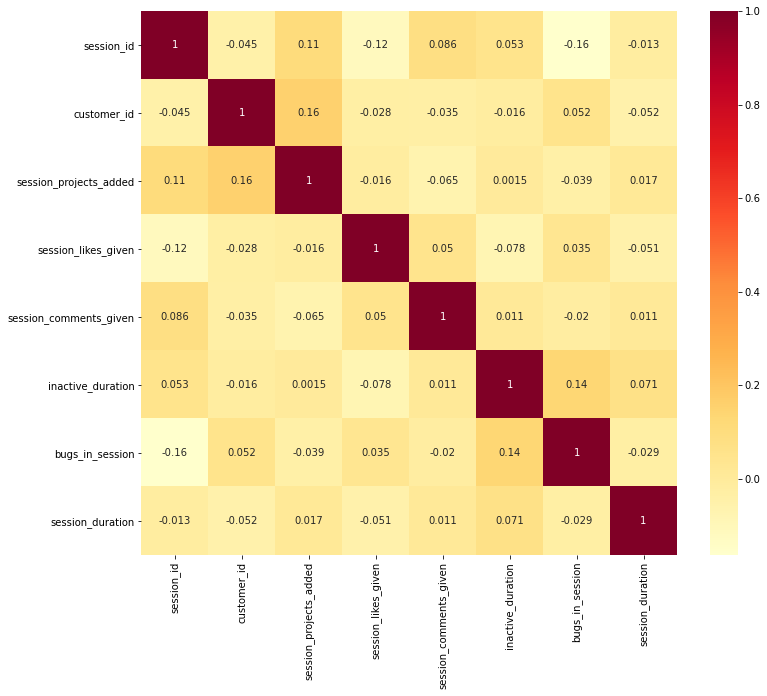

In [78]:
plt.figure(figsize=(12,10))
sns.heatmap(data_clean.corr(),annot=True,cmap='YlOrRd')

As we can observe, there is no correlation between the variables. This means that we cannot observe any patterns between them. This means that the increase or decrease in a single variable directly affects the behaviour of another variable. 

We can further prove this by using some pairwise scatter plots:

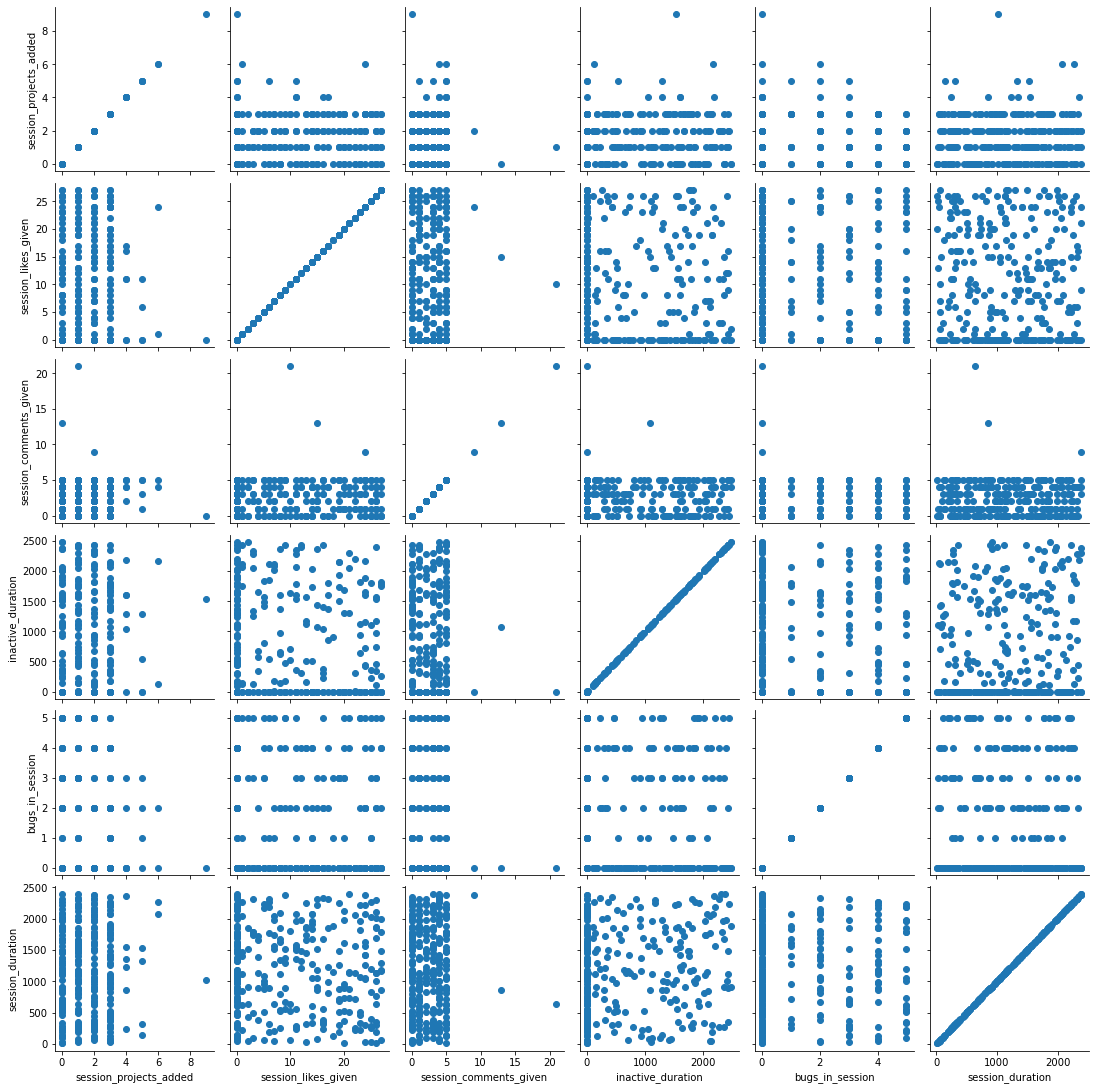

In [36]:
g=sns.PairGrid(data_clean[['session_projects_added', 'session_likes_given','session_comments_given', 'inactive_duration', 'bugs_in_session','session_duration']])
g.map(plt.scatter)

The following observations are made from the above grid:<br/>
1. People mostly add upto 4 projects in a single session<br/>
2. Very rarely does anyone leave over 5 comments in a single session<br/>
3. Majority people do not get bugs (which is a good thing) <br/>
4. None of the columns are correlated to each other AT ALL

##### 2. Getting various mutations of our current dataset for manipulation and analysis, a.k.a. feature engineering

In this section, I will group the data set using the date, for time series based analysis, and by user, to get certain user behaviours. But first, I will convert the login_date column to a datetime object.

In [42]:
#hangine string to datetime object
import datetime
data_clean['login_date'] = data_clean['login_date'].map(lambda x: datetime.datetime.strptime(x,'%m/%d/%y'))

<ipython-input-42-14a768a2d2ab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['login_date'] = data_clean['login_date'].map(lambda x: datetime.datetime.strptime(x,'%m/%d/%y'))


In [48]:
data_numerical = data_clean[['session_id', 'customer_id', 'login_date','session_projects_added', 'session_likes_given','session_comments_given', 'inactive_duration', 'bugs_in_session','session_duration']]

In [51]:
dates = data_numerical.groupby('login_date')
users = data_numerical.groupby('customer_id')

In [67]:
dates_sum = dates.sum()
dates_sum['date'] = list(dates_sum.index)

In [61]:
l1 = pd.DataFrame(pd.value_counts(data_numerical['login_date']))
l1 = l1.rename(columns={"login_date": "no_of_cust"})

In [62]:
l1['login_date'] = list(l1.index)

In [69]:
dates_sum = pd.merge(dates_sum,l1,how='outer',on='login_date')

In [83]:
dates_sum['session_duration'] = dates_sum['session_duration']/3600 #to get duration in hours

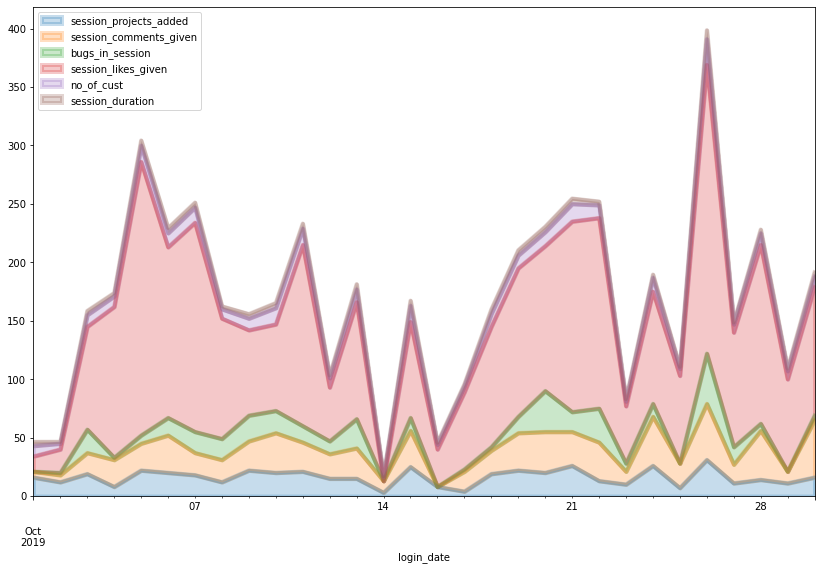

In [91]:
dates_sum.plot(x='login_date',y=['session_projects_added','session_comments_given','bugs_in_session','session_likes_given','no_of_cust','session_duration'],kind='area',figsize=(14,9),alpha=0.25,lw=4)

##### In the above few cells of code, I converted the login_date column to datetime format, then groupedby the date and aggregated by sum of values. After that, I added a column for total number of customers per day and then created the area plot to see the pattern throughout the month

As it is observed, the overall pattern throughout the columns is pretty consistent. Let's try to make a correlation matrix pf our new dataset to check if there are any new correlations.

In [73]:
dates_sum.columns

Index(['login_date', 'session_id', 'customer_id', 'session_projects_added',
       'session_likes_given', 'session_comments_given', 'inactive_duration',
       'bugs_in_session', 'session_duration', 'date', 'no_of_cust'],
      dtype='object')

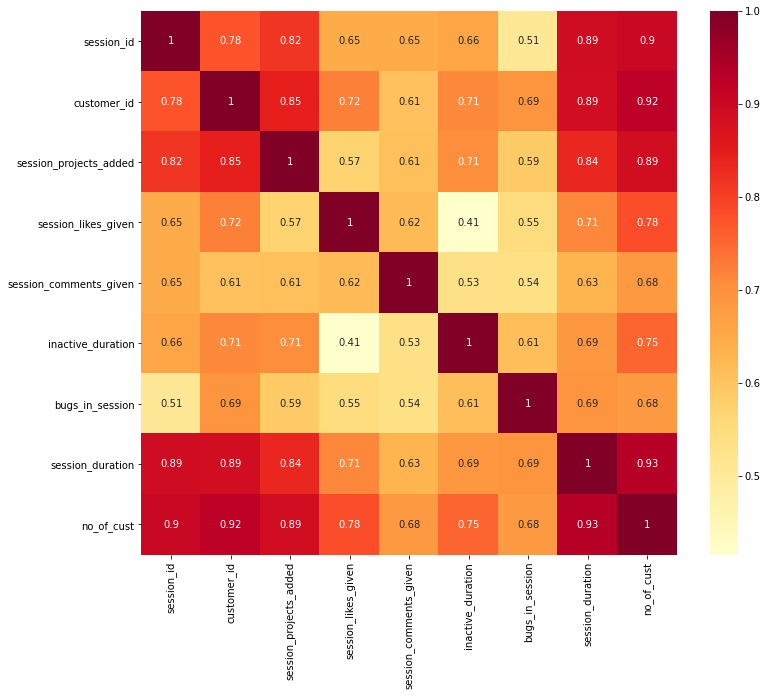

In [79]:
plt.figure(figsize=(12,10))
sns.heatmap(dates_sum.corr(),annot=True,cmap='YlOrRd')

There are many many correlations amoung varibales now. This is because, when we took the sum, we know that obviously, if there are users coming in on a new day who perform certain activities, there is going to be an increase in total likes, comments, projects added, bugs and session times. This explains the sudden increase in correlation amoung variables. 

It is observed from the line graph that the number of users dropped a lot mid month and peaked towards the end and beginning. If there is a similar pattern in other months, then we can come up with better marketing strategies for the time that the number of users drops, like widening our ad reach, getting more promotions for valid months (like august/jan could be back to school months for students). If the peaking is constant through other months also, then taking advantage of loyalty programs or referrals or reward based systems could be good idea to keep user retaining levels high.

Now, lets try to calculate the most active user. This is helpful to see user behaviour over time. I have come up with a formula for now to calculate user rankings. This isn't the most efficient formula but it gives us a general idea of which user has the most actitivity.

In [92]:
cust_sum = users.sum()

In [94]:
cust_sum['session_duration'] = cust_sum['session_duration']/3600 #to get duration in hours

In [99]:
l2 = pd.DataFrame(pd.value_counts(data_numerical['customer_id']))
l2 = l2.rename(columns={"customer_id": "no_of_sessions"})

In [100]:
l2['customer_id'] = list(l2.index)

In [102]:
cust_sum = pd.merge(cust_sum,l2,how='outer',on='customer_id')

In [103]:
cust_sum.head()

,customer_id,session_id,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration,no_of_sessions
0,10246.0,733949.0,8.0,53.0,3.0,2435.0,9.0,0.795278,4
1,12407.0,4458042.0,17.0,82.0,24.0,6038.0,6.0,3.407222,8
2,12496.0,3551658.0,9.0,53.0,23.0,4878.0,4.0,1.744167,6
3,12940.0,2640285.0,2.0,89.0,15.0,3521.0,3.0,1.783611,5
4,14354.0,9383233.0,31.0,150.0,38.0,8964.0,15.0,4.843611,15


The formula that I came up with is: <br/>
activity score = (projects added + likes given + comments given - bugs occured)* (session duration / no of sessions)<br/>
I realize that this isn't the best way to compute activity, but it gives us the information we need for now. With more data available, we will be able to include more factors and even have targetted marketing strategies. Like, if a user has 0 projects added, we can suggest certain datasets or links based on their likes to datasets.

In [104]:
cust_sum['activity_score'] = (cust_sum['session_projects_added']+cust_sum['session_likes_given']+cust_sum['session_comments_given']-cust_sum['bugs_in_session']) * (cust_sum['session_duration'] / cust_sum['no_of_sessions'])

In [109]:
cust_sum['cust_rank'] = cust_sum['activity_score'].rank(ascending=False,method='first')

In [110]:
cust_sum.head()

,customer_id,session_id,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration,no_of_sessions,activity_score,cust_rank
0,10246.0,733949.0,8.0,53.0,3.0,2435.0,9.0,0.795278,4,10.935069,30.0
1,12407.0,4458042.0,17.0,82.0,24.0,6038.0,6.0,3.407222,8,49.830625,12.0
2,12496.0,3551658.0,9.0,53.0,23.0,4878.0,4.0,1.744167,6,23.546250,20.0
3,12940.0,2640285.0,2.0,89.0,15.0,3521.0,3.0,1.783611,5,36.742389,14.0
4,14354.0,9383233.0,31.0,150.0,38.0,8964.0,15.0,4.843611,15,65.873111,8.0


In [113]:
cust_sum[cust_sum['cust_rank']==1] # our most active user

,customer_id,session_id,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration,no_of_sessions,activity_score,cust_rank
18,29375.0,11452204.0,20.0,189.0,44.0,11867.0,26.0,8.432222,22,87.005202,1.0


For users who have lower activity scores or rankings through a period of time, we can have special promos or user engagement offers to help increase activity (not enough to annoy users to unsubscribe though :P )

As for users who have higher activity scores,we can come up with merchandise distribution, or reward points. 

If we have more data avaialble, say more columns or more data for other months, it opens up opportunities to find a lot of other features about users that can be reflected in marketing and user engagement strategies. This will not only help increase web based revenue and get more organic users, but also in getting higher page rankings on Google. 

(I'm sorry, but right now google still corrects my search term from 'showwcase' to 'showcase' and the first result is showcase cinemas). My experience with marketing, web page, SEO and user engagement analysis along with the expertise that my mentors at showwcase would give me, will definitely (hopefully) show results over time. 

### Thank you so much for giving me the opportunity to work on this dataset. I really enjoyed working on it and producing meaningful insights. I look forward to hearing from you :) <br/>
#### Niyati Vikas Chopra